In [1]:
#importing all useful libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report


In [3]:
#reading csv file
df=pd.read_csv("Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
#removing Id Column permanently
df.drop(columns =["Id"],inplace=True)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [13]:
#data have 150 rows and 5 columns
df.shape


(150, 5)

In [15]:
#data is already preprocessed
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

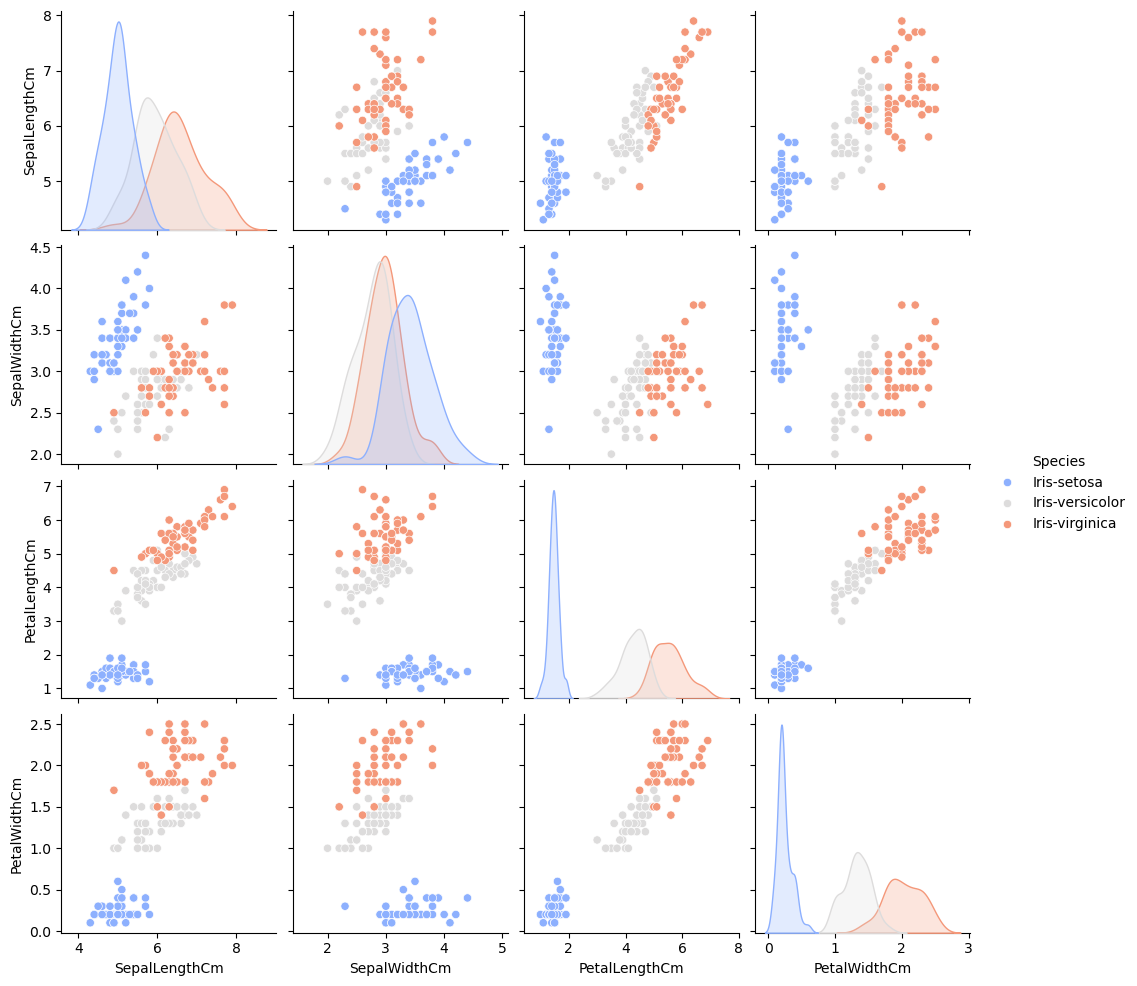

In [17]:
#plotting the relation between each label with other labels so we can classify easily
sns.pairplot(df, hue="Species", palette="coolwarm")
plt.show()

In [18]:
#training and testing 
#as data have 150 rows training with 120 rows and testing have 30 rows 
X = df.drop(columns = ["Species"])
Y = df['Species']

In [19]:
#training 80% and testing 20%
x_train, x_test,y_train, y_test = train_test_split(X ,Y ,test_size = 0.20)
print(x_train.shape)  # Should be (number_of_train_samples, number_of_features)
print(x_test.shape)   # Should be (number_of_test_samples, number_of_features)
print(y_train.shape)  # Should be (number_of_train_samples,)
print(y_test.shape)   # Should be (number_of_test_samples,)

(120, 4)
(30, 4)
(120,)
(30,)


In [20]:

model = LogisticRegression()
model.fit(x_train, y_train)



LogisticRegression()

In [21]:
print("Accuracy: ",model.score(x_test, y_test)*100)

Accuracy:  86.66666666666667


In [22]:
# Confusion matrix
cm = confusion_matrix(y_test, model.predict(x_test))
print("Confusion Matrix:\n", cm)

# Classification report
report = classification_report(y_test, model.predict(x_test))
print("Classification Report:\n", report)


Confusion Matrix:
 [[11  0  0]
 [ 0  7  1]
 [ 0  3  8]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.70      0.88      0.78         8
 Iris-virginica       0.89      0.73      0.80        11

       accuracy                           0.87        30
      macro avg       0.86      0.87      0.86        30
   weighted avg       0.88      0.87      0.87        30



In [23]:
# knn - K-nearest neighbor

model = KNeighborsClassifier()

In [27]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [33]:
print("Accuracy: ",model.score(x_test, y_test)*100)

Accuracy:  96.66666666666667


In [35]:
# decision tree
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [37]:
# Ask for custom input from the user for each feature
sepal_length = float(input("Enter sepal length: "))  # Convert to float
sepal_width = float(input("Enter sepal width: "))    # Convert to float
petal_length = float(input("Enter petal length: "))  # Convert to float
petal_width = float(input("Enter petal width: "))    # Convert to float

# Create a new data point (using the user's input)
new_point = np.array([sepal_length, sepal_width, petal_length, petal_width])

# Use the trained logistic regression model to predict the class of the new data point
prediction = model.predict(new_point.reshape(1, -1))  # Reshape to 2D array as model expects 2D input

# Output the prediction
print("Predicted class: ", prediction[0])

# If you want to get the probability of the new data point belonging to each class
probability = model.predict_proba(new_point.reshape(1, -1))
print("Predicted class probabilities: ", probability)


Enter sepal length:  4
Enter sepal width:  6
Enter petal length:  6
Enter petal width:  0.4


Predicted class:  Iris-setosa
Predicted class probabilities:  [[1. 0. 0.]]


/home/rgukt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/rgukt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
